### Simple Linear Regression Example 4.2 
For the **Advertising** data set we determine the 95% confidence intervals for the following values of **TV** : $ 3 $, $ 100 $ and $ 275 $

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

# Fit Linear Model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

# Prediction at points 3, 100 and 270
x0 = [3, 100, 275]
x0 = sm.add_constant(x0)

predictionsx0 = model.get_prediction(x0)
predictionsx0 = predictionsx0.summary_frame(alpha=0.05)
predictionsx0 = np.round(predictionsx0, 4)
print(predictionsx0)

      mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0   7.1752   0.4509         6.2860         8.0644        0.6879       13.6626
1  11.7863   0.2629        11.2678        12.3047        5.3393       18.2333
2  20.1052   0.4143        19.2882        20.9221       13.6273       26.5830


In the **Python**-output, the values 
\begin{equation*}
\hat{y}_{0}
=\hat{\beta}_{0}+\hat{\beta}_{1}x_{0}
\end{equation*} 

can be found under **mean**; they correspond to the $y$-values on the regression line, thus to the predicted response given a predictor value. 
Under **mean ci lower** the lower limits, under **mean ci upper** the upper limits of the corresponding confidence intervals can be found. 

For the value $ x_{0}=100 $ the 95% confidence interval is given by
\begin{equation*}
[11.268,12.305]
\end{equation*}
The expected value of $\hat{y}_0$ given the predictor value $ x_{0}=100 $ is contained in this interval with a probability of  95%. 

We can visualize confidence intervals for the expected response variable given an intervall of predictor values. In the next figure the regression line is plotted in blue. The green curves correspond to the lower and upper limits of the confidence intervals given a $ x_{0} $. The red lines represent the 95% confidence intervals for the values $ x_{0}=3, 100$ and $ 275 $. These intervals contain with a probability of 95% the corresponding expected values of $\hat{y}_{0} $.  

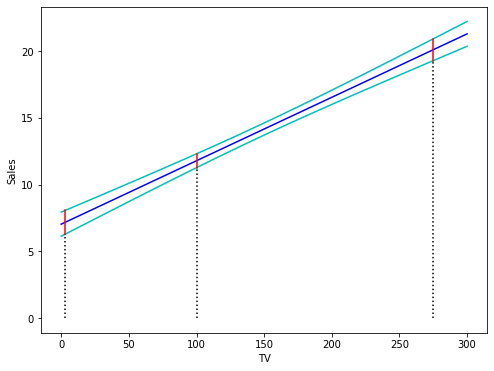

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(0, 300)
x_sm = sm.add_constant(x)

# Predictions
predictionsx = model.get_prediction(x_sm)
# at 95% confidence:
predictionsx = predictionsx.summary_frame(alpha=0.05)

# Create figure and plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
# prediction
plt.plot(x, predictionsx.loc[:,'mean'], 'b-')
# upper and lower boundaries at 95%
plt.plot(x, predictionsx.loc[:,'mean_ci_lower'], 'c-')
plt.plot(x, predictionsx.loc[:,'mean_ci_upper'], 'c-')
# lines of the three points in x0:
for i in range(len(x0)):
    plt.plot([x0[i, 1], x0[i, 1]], 
             [0, predictionsx0.loc[:,'mean_ci_lower'][i]], 'k:' )
    plt.plot([x0[i, 1], x0[i, 1]], 
             [predictionsx0.loc[:,'mean_ci_lower'][i], 
              predictionsx0.loc[:,'mean_ci_upper'][i]], 'r-' )

# Set labels and Legend
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

plt.show()

### Simple Linear Regression Example 4.4
In the case of the **Advertising** data we determine the 95% prediction intervals for the $x$-values $ 3 $, $ 100 $ and $ 225 $ from the same results as provided in the previous example. 

Under **mean** the predicted $y$-values on the regression line 
\begin{equation*}
\hat{y}_{0}
=\hat{\beta}_{0}+\hat{\beta}_{1}x_{0}
\end{equation*} 
can be found.

**obs ci lower** displays the lower limits and **obs ci upper** the upper limits of the prediction intervals for the given $x$-values.

For the predictor value $ x_{0}=100 $ the 95% prediction interval is given by
\begin{equation*}
[5.339,18.233]
\end{equation*}
A future observation $y_0 $ for given $ x_{0}=100 $ will fall with a probability of 95% into this interval. As we can observe, the prediction interval thus is clearly larger than the confidence interval for the expected value of $\hat{y}_0=\hat{\beta}_0+\hat{\beta}_1 x_{0}$.   

It is again very instructive to visualize the point-wise prediction intervals. The following figure displays the regression line in blue. The green curves represent the upper and lower limits of the prediction intervals for future observations. The red lines correspond to 95% prediction intervals for  $ x_{0}=3, 100 ,275 $. These intervals contain with a probability of  95% the true values of the corresponding future observations $ y_{0} $.

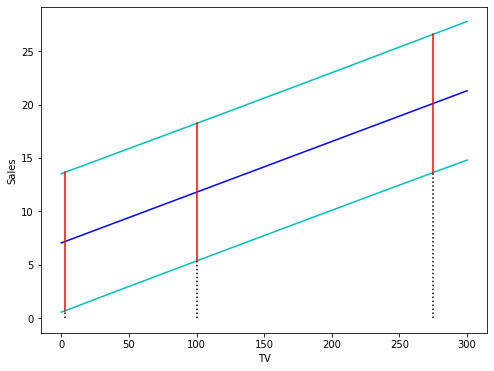

In [3]:
x = np.linspace(0, 300)
x_sm = sm.add_constant(x)

# Predictions
predictionsx = model.get_prediction(x_sm)
# at 95% confidence:
predictionsx = predictionsx.summary_frame(alpha=0.05)

# Create figure and plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
# prediction
plt.plot(x, predictionsx.loc[:,'mean'], 'b-')
# upper and lower boundaries at 95%
plt.plot(x, predictionsx.loc[:,'obs_ci_lower'], 'c-')
plt.plot(x, predictionsx.loc[:,'obs_ci_upper'], 'c-')
# lines of the three points in x0:
for i in range(len(x0)):
    plt.plot([x0[i, 1], x0[i, 1]], 
             [0, predictionsx0.loc[:,'obs_ci_lower'][i]], 'k:' )
    plt.plot([x0[i, 1], x0[i, 1]], 
             [predictionsx0.loc[:,'obs_ci_lower'][i], 
              predictionsx0.loc[:,'obs_ci_upper'][i]], 'r-' )

# Set labels and Legend
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

plt.show()